In [1]:
import pandas
import numpy as np
import glob
import os, sys
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [3]:
path ="/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/roadmap_multi_data/hg38/human_specific"
os.chdir(path)

In [4]:
file_list = glob.glob("*chr*")

In [160]:
merged = pandas.DataFrame(np.arange(101), columns = ["num_species"])
df_dump = pandas.DataFrame(columns = ["chr", "overlap-enh", "species_count"])

In [ ]:
# run this once and only once. The script creates a HUGE dataframe containing Roadmap sample overlap counts and Hg38 100way Multiz counts from roadmap coordinates
for file in file_list:
    
    # read each chromosome file
    df = pandas.read_table(file, sep = '\t', header =-1)
    
    # rename the columns
    df.columns = ["chr", "start", "end", "overlap-enh", "overlap-percentile", "hg38chr", "hg38start", "hg38end", "strand", "ref", "species_count", "nonsense", "names", "length"]

    # ignore the roadmap peaks that don't map to hg38
    df = df.loc[df["length"]>0]
    
    #turn dtype into numeric
    df["species_count"] = df["species_count"].apply(pandas.to_numeric)
    
    #make a mini dataframe to dump into massive df_dump file
    short_df = df[["chr", "overlap-enh", "species_count"]]
    
    # append the short_df file to the massive dump file. 
    df_dump = df_dump.append(pandas.DataFrame(data = short_df), ignore_index=True)

In [3]:
df_dump_file='/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/roadmap_multi_data/hg38/human_specific/20180703_df_dump_species_count_enhancer_overlap.tsv'

In [4]:
df_dump = pandas.read_csv(df_dump_file, sep = '\t')

In [11]:
# Annotate human specific "hs" (1) and not human-specific enhancer (0) peaks
df_dump['hs'] = np.where(df_dump['species_count']==0, 1, 0)

#F***. How big is this dataset?
hs = df_dump.loc[df_dump["hs"] == 1]
con = df_dump.loc[df_dump["hs"] == 0]

print(len(hs), " - peaks are human-specific")
print(len(con), " - peaks are conserved")

4958  - peaks are human-specific
35490853  - peaks are conserved


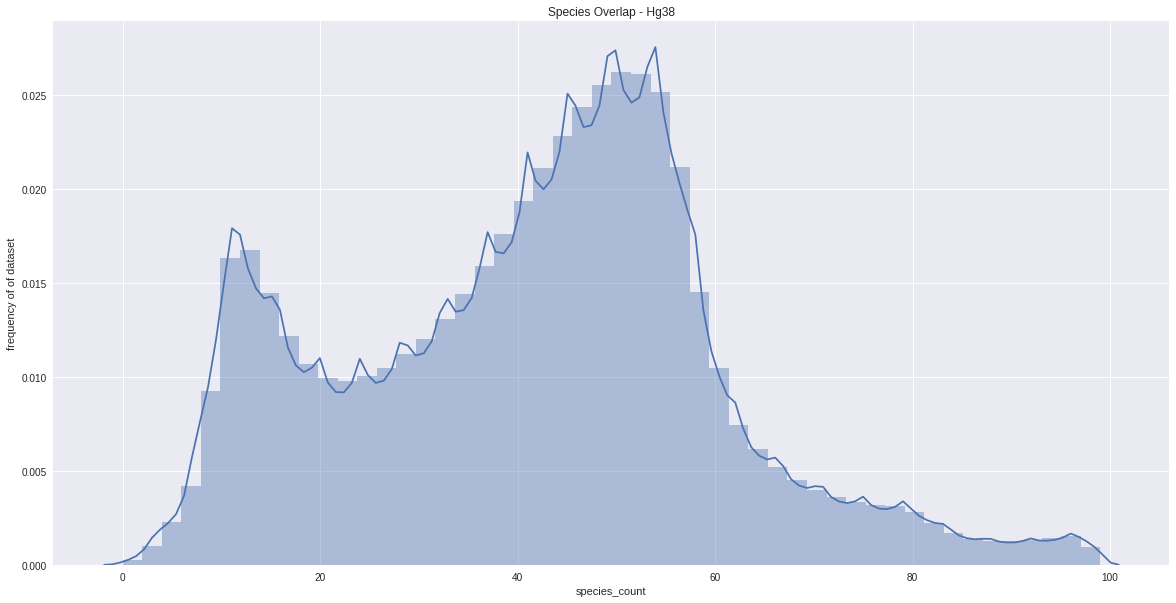

In [25]:
#plot species overlap
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

#plot each species
ax=sns.distplot(df_dump["species_count"])
plt.ylabel("frequency of of dataset")
plt.title ("Species Overlap - Hg38")
#ax.title = "%s hg38 100way species counts v. enhancer-overlap" % chrnum
#plt.ylim(-10, 70)

plt.show()

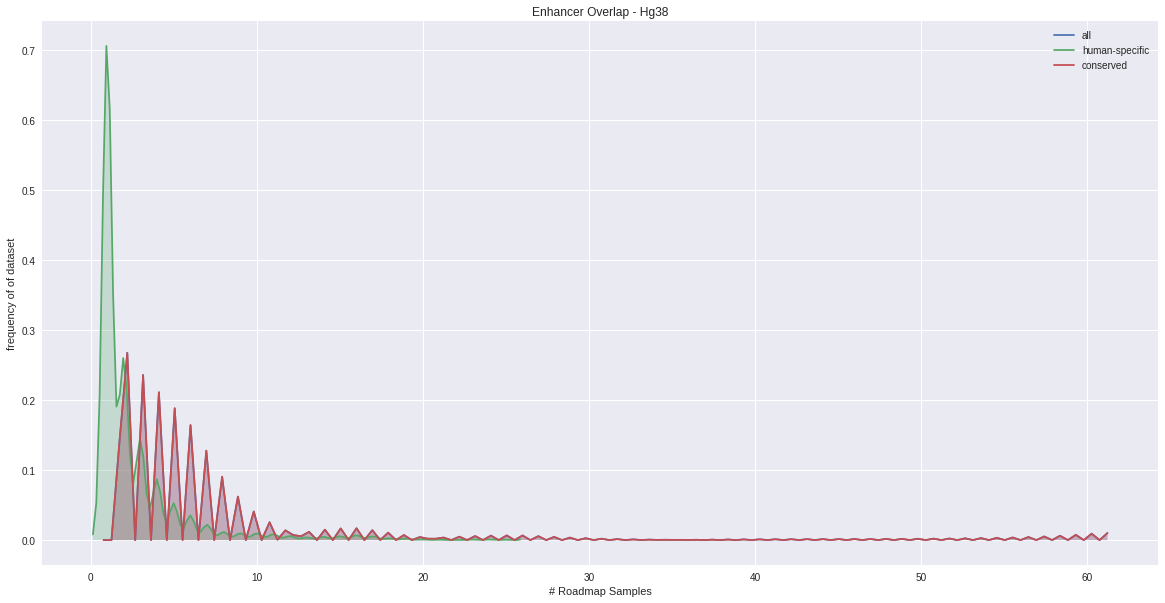

In [26]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.kdeplot(df_dump["overlap-enh"], shade = True, label = "all")
sns.kdeplot(hs["overlap-enh"], shade = True, label = "human-specific")
sns.kdeplot(con["overlap-enh"], shade = True, label = "conserved")

plt.xlabel("# Roadmap Samples")
plt.ylabel("frequency of of dataset")
plt.title ("Enhancer Overlap - Hg38")

plt.legend();

plt.show()

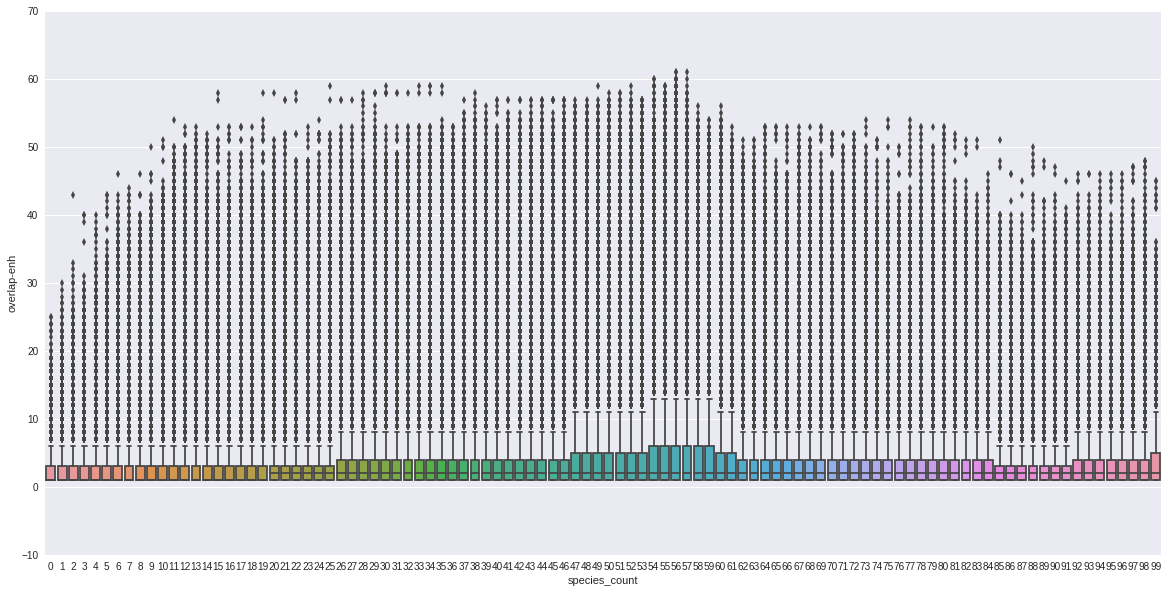

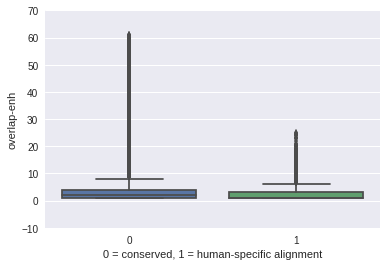

In [27]:
#plot the data by chromosome, and by human-specific status. 
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

#plot each species
ax=sns.boxplot(x= "species_count", y = "overlap-enh", data = df_dump)
plt.title = "%s hg38 100way species counts v. enhancer-overlap" % chrnum
plt.ylim(-10, 70)

plt.show()

# plot summary of hspecific v. not hspecific
ax=sns.boxplot(x= "hs", y = "overlap-enh", data = df_dump)
plt.title = "%s hg38 100way human-specific v. conserved enhancer-overlap" % chrnum
plt.ylim(-10, 70)
plt.xlabel("0 = conserved, 1 = human-specific alignment")

plt.show()

In [32]:
# change the datatype

df_dump["overlap-enh"] = df_dump["overlap-enh"].astype('int')
df_dump["species_count"] = df_dump["species_count"].astype('int')

In [1]:
#plot the data by chromosome, and by human-specific status. 

#Hex bin of All data
with sns.axes_style("white"):
    sns.jointplot(x=df_dump["species_count"], y=df_dump["overlap-enh"], kind="hex", color ="k")

NameError: name 'sns' is not defined

In [ ]:
#plot the data by chromosome, and by human-specific status. 

with sns.axes_style("white"):
    sns.jointplot(x=bae["species_count"], y=bae["overlap-enh"], kind="hex", color="b")
    plt.title("HEX plot- broadly active enhancers (>=5 samples)")

In [ ]:
# KERNAL DENSITY PLOT takes forever. Run on slurm?
#sns.jointplot(x="species_count", y="overlap-enh", data=df_dump, kind="kde")

In [96]:
# save the dump file with all the sample overlap and species records

df_dump.to_csv("%s/20180703_df_dump_species_count_enhancer_overlap.tsv"%path, sep = '\t', index = False, header = True)

In [115]:
# stats on human specific enhancer overlap and species count

df_dump.loc[df_dump["hs"]==1].describe(percentiles = [0, 0.1, 0.25, 0.5, 0.75, 0.9], include = 'all')

,chr,overlap-enh,species_count,hs
count,4958,4958.000000,4958.0,4958.0
unique,22,NaN,NaN,NaN
top,chr1,NaN,NaN,NaN
freq,573,NaN,NaN,NaN
mean,NaN,2.612545,0.0,1.0
std,NaN,3.019361,0.0,0.0
min,NaN,1.000000,0.0,1.0
0%,NaN,1.000000,0.0,1.0
10%,NaN,1.000000,0.0,1.0
25%,NaN,1.000000,0.0,1.0


In [120]:
# stats on conserved enhancer overlap and species count

df_dump.loc[df_dump["hs"]==0].describe(percentiles =[0, 0.1, 0.25, 0.5, 0.75, 0.9], include = 'all')

,chr,overlap-enh,species_count,hs
count,35490853,3.549085e+07,3.549085e+07,35490853.0
unique,22,NaN,NaN,NaN
top,chr1,NaN,NaN,NaN
freq,3543489,NaN,NaN,NaN
mean,NaN,3.639798e+00,4.143431e+01,0.0
std,NaN,4.705280e+00,1.906357e+01,0.0
min,NaN,1.000000e+00,1.000000e+00,0.0
0%,NaN,1.000000e+00,1.000000e+00,0.0
10%,NaN,1.000000e+00,1.400000e+01,0.0
25%,NaN,1.000000e+00,2.700000e+01,0.0


In [29]:
# the 90th percentile of h-specific sample overlap is 5 samples.

bae = df_dump.loc[df_dump["overlap-enh"]>=5]

hs_bae = len(bae.loc[df_dump["hs"] == 1])
con_bae = len(bae.loc[df_dump["hs"] ==0])

print(hs_bae, " - bae peaks (>=5 samples) are human-specific")
print(con_bae, " - bae peaks (>=5 samples) are conserved")


668  - bae peaks (>=5 samples) are human-specific
8096707  - bae peaks (>=5 samples) are conserved


In [138]:
hs_bae/con_bae

8.250267670548039e-05

In [139]:
hs/con

0.00013969796668454262

In [137]:
# fisher's exact test of human-specific v. conserved, broadly active v. non-broadly active. 
# this is a two-sided test by default.

oddsratio, pvalue = stats.fisher_exact([[hs, con], [hs_bae, con_bae]])

print("OR: ", oddsratio, "\np-Value: ", pvalue)

OR:  1.69325374961 
p-Value:  2.63324423782e-42


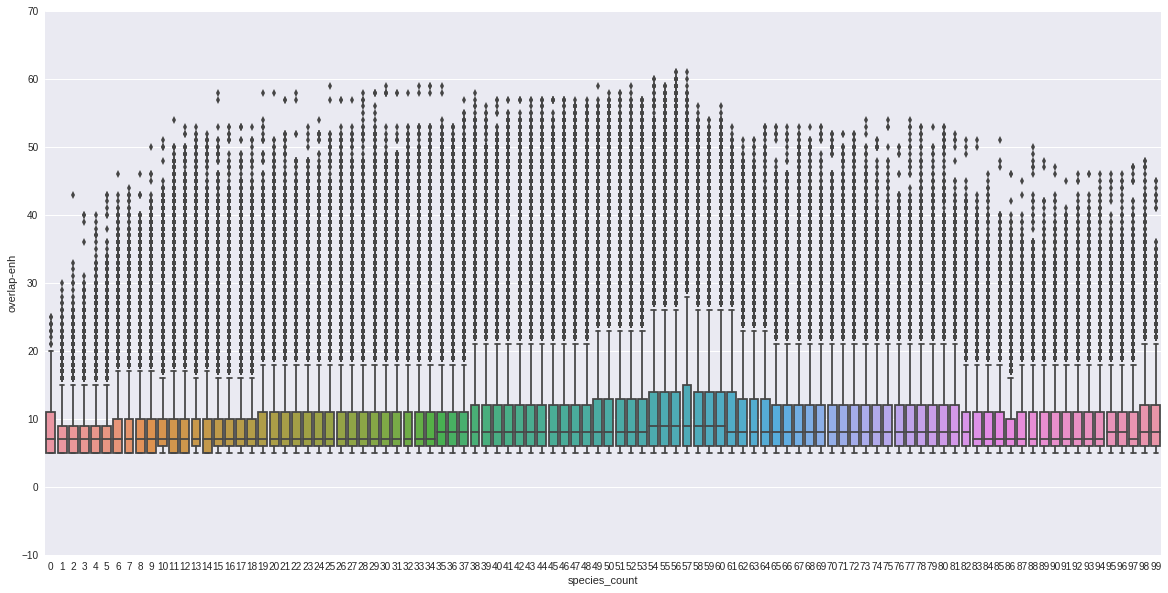

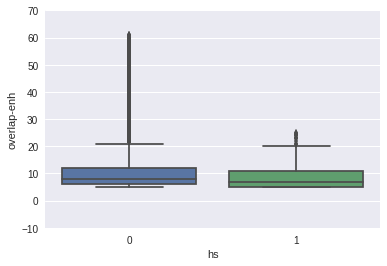

In [31]:
# test cell for plotting, measuring human specificity. 

a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

#plot each species
ax=sns.boxplot(x= "species_count", y = "overlap-enh", data = bae)
plt.title = "hg38 100way species counts v. enhancer-overlap" 
plt.ylim(-10, 70)
plt.show()

# plot summary of hspecific v. not hspecific
ax=sns.boxplot(x= "hs", y = "overlap-enh", data = bae)
plt.ylim(-10, 70)
plt.xlabel("0 = conserved, 1 = human-specific alignment")

plt.title = "hg38 100way human-specific v. conserved enhancer-overlap"
plt.show()

In [167]:
# is the difference between conserved and human specific enhancer overlap significant?
con_stat = df_dump["overlap-enh"].loc[df_dump["hs"]==0]
hum_stat = df_dump["overlap-enh"].loc[df_dump["hs"]==1]

stats.ttest_ind(hum_stat, con_stat, equal_var = False)

Ttest_indResult(statistic=-23.95199716886555, pvalue=4.5849098094415393e-120)

In [168]:
# WELCH'S test - I assume the distribution of 
# is the difference between conserved and human specific enhancer overlap significant?

con_stat = bae["overlap-enh"].loc[bae["hs"]==0]
hum_stat = bae["overlap-enh"].loc[bae["hs"]==1]

stats.ttest_ind(hum_stat, con_stat, equal_var = False)

Ttest_indResult(statistic=-8.2852407379787394, pvalue=6.4633729726640987e-16)

In [ ]:
# HEX PLOT
# This takes forever. still.
# sns.jointplot(x="species_count", y="overlap-enh", data=bae, kind="hex")

In [156]:
#Collect the roadmap enhancer coordinates, their sample overlap, and the number of hg38 100way multiz species for further analysis. 
df_tissue_dump = pandas.DataFrame(columns = ["chr","start","end", "overlap-enh", "species_count"])

In [ ]:
# this is similar to the for-loop above, but this time it builds a file containing the roadmap enhancer genomic coordinates for each peak, the number of samples it overlaps, and the number of species conserved. 
for file in file_list:
    
    # read each chromosome file
    df = pandas.read_table(file, sep = '\t', header =-1)
    
    # rename the columns
    df.columns = ["chr", "start", "end", "overlap-enh", "overlap-percentile", "hg38chr", "hg38start", "hg38end", "strand", "ref", "species_count", "nonsense", "names", "length"]

    # ignore the roadmap peaks that don't map to hg38
    df = df.loc[df["length"]>0]
    
    #turn dtype into numeric
    df["species_count"] = df["species_count"].apply(pandas.to_numeric)
    
    #make a mini dataframe to dump into massive df_dump file
    short_df = df[["chr","start", "end", "overlap-enh", "species_count"]]
    
    # append the short_df file to the massive dump file. 
    df_tissue_dump = df_tissue_dump.append(pandas.DataFrame(data = short_df), ignore_index=True)

In [159]:
df_tissue_dump.to_csv("%s/20180703_df_tissue_dump_species_count_enhancer_overlap.tsv"%path, sep = '\t', index = False, header = True)